# Kodluyoruz & Carbon Consulting Data Science Bootcamp

## Week04 Task1

### By : Berk Pişkin

In this project, I am going to employ Principal Component Analysis technique to increase the classification performance on "Credit Risk Prediction" dataset.

Principal Component Analysis (PCA) is a widely used tool to reduce the dimensionality of a given feature space, make the dataset simplier, easy to visualize etc. But just like any other technique which is designed to "make things easier", it comes with a price. While reducing the dimensionality on the data and time required to train the chosen machine learning algorithm, it costs some accuracy. I will also use methods like variance analysis and randomized-grid search to create a balance dimensionality reduction-accuracy trade-off.

## Preprocessing :

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
%matplotlib inline
sns.set()
matplotlib.rcParams['figure.dpi'] = 144

In [2]:
df = pd.read_csv("C:/Users/Brotial Art/Desktop/credit_risk_dataset.csv")

In [3]:
print(df.isnull().sum())

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64


In [4]:
# Fill null values with median values in respective columns
df["person_emp_length"].fillna(df["person_emp_length"].median(), inplace=True)
df["loan_int_rate"].fillna(df["loan_int_rate"].median(), inplace=True)

In [5]:
df.duplicated().sum()

165

In [6]:
# Getting rid of duplicates
df.drop_duplicates(inplace=True)

In [7]:
# Descriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,32416.0,27.747008,6.354100,20.00,23.00,26.00,30.00,144.00
person_income,32416.0,66091.640826,62015.580269,4000.00,38542.00,55000.00,79218.00,6000000.00
person_emp_length,32416.0,4.768880,4.090411,0.00,2.00,4.00,7.00,123.00
loan_amnt,32416.0,9593.845632,6322.730241,500.00,5000.00,8000.00,12250.00,35000.00
loan_int_rate,32416.0,11.014662,3.083050,5.42,8.49,10.99,13.11,23.22
loan_status,32416.0,0.218688,0.413363,0.00,0.00,0.00,0.00,1.00
loan_percent_income,32416.0,0.170250,0.106812,0.00,0.09,0.15,0.23,0.83
cb_person_cred_hist_length,32416.0,5.811297,4.059030,2.00,3.00,4.00,8.00,30.00


In [8]:
# Getting rid of outliers
df = df[df['person_age']<=100]
df = df[df['person_emp_length'] <= 60]
df = df[df['person_income']<=4e6]

In [9]:
# Creating dummies for categorical features
cat_cols = pd.DataFrame(df[df.select_dtypes(include=['object']).columns])
print(f"Categorical columns : {list(cat_cols.columns)}")
encoded_cat_cols = pd.get_dummies(cat_cols)
df.drop(df.select_dtypes(include=['object']).columns, axis=1,inplace=True)
df = pd.concat([df,encoded_cat_cols], axis=1)



Categorical columns : ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']


In [10]:
# Train-test split
from sklearn.model_selection import StratifiedShuffleSplit
X = df.drop('loan_status', axis=1).values
y = df['loan_status'].values

split = StratifiedShuffleSplit(1, test_size=0.1)
train_idx, test_idx = next(split.split(X, y))
train_x = X[train_idx]
test_x = X[test_idx]

train_y = y[train_idx]
test_y = y[test_idx]

From the descriptive statistics, I've concluded that different features scales dramatically different within, thus the data needs to be scaled prior to PCA. 

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

Different number of components provides different amounts of variance protection.Let's try to understand the correlation between component number and variance protection.

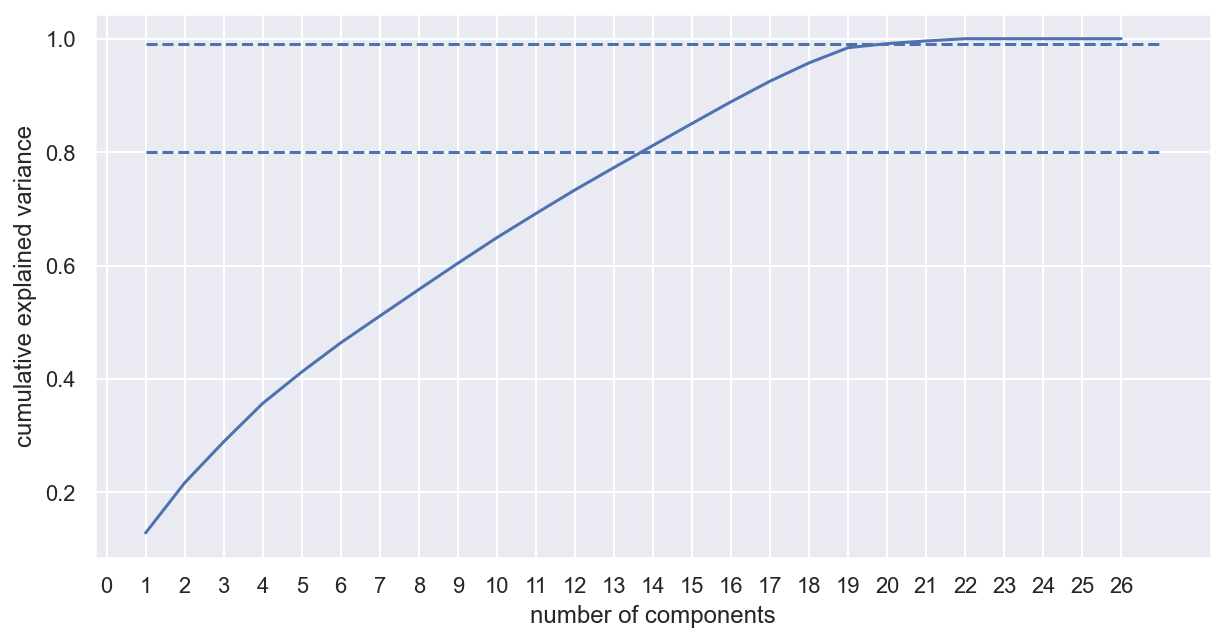

In [12]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
p = X_scaled.shape[-1]
pca = PCA()
pca.fit_transform(X_scaled)
cumulative_explained_var = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize = (10,5))
plt.plot(range(1, p + 1), cumulative_explained_var)
plt.xticks(range(0,p+1))
plt.hlines(0.8, 1, p+1, linestyles='--')
plt.hlines(0.99, 1, p+1, linestyles='--')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

So in order to protect 80% - 99% variance, number of components must be in the range of 14-19.

## Visualization using dimensionality reduction :

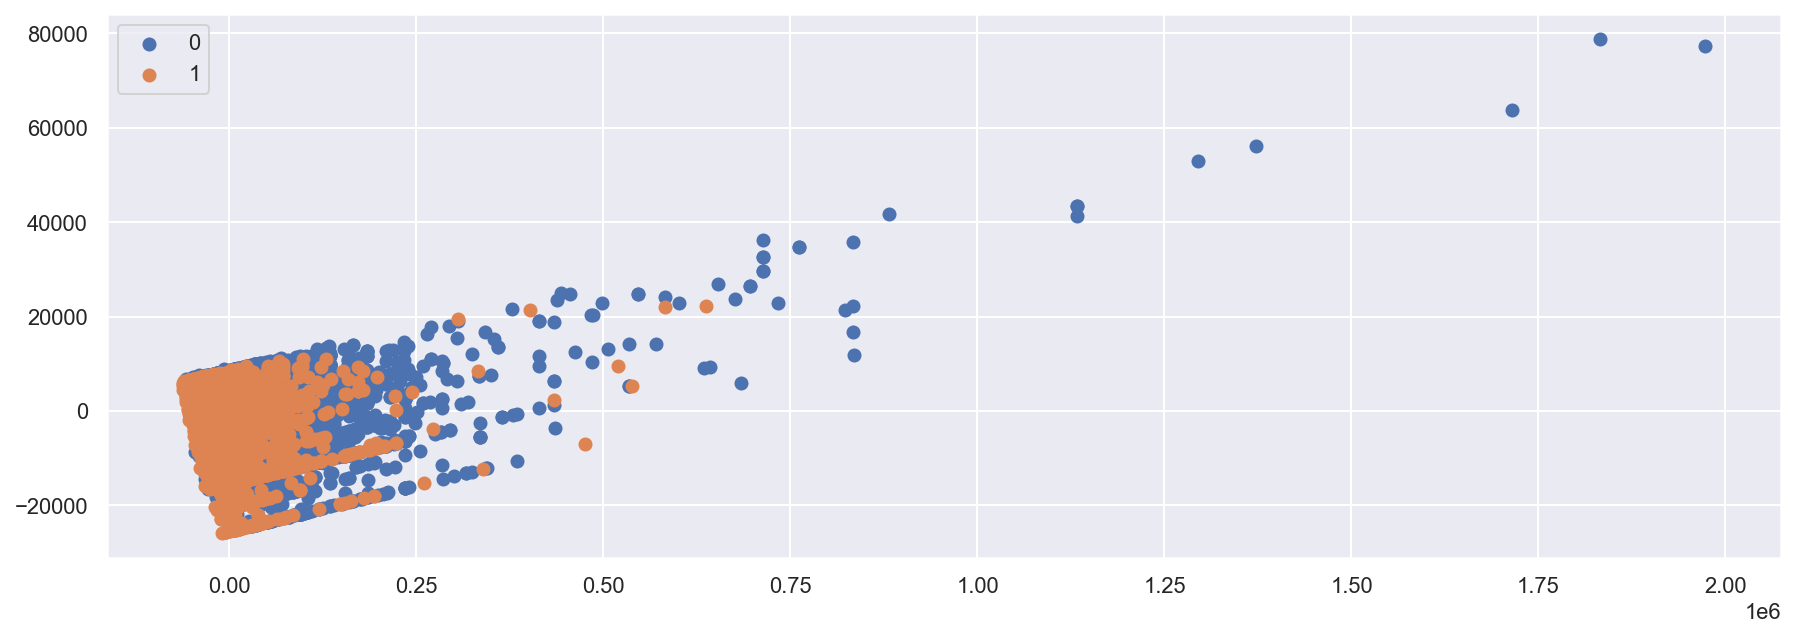

In [18]:
pca = PCA(n_components=15)
X2D = pca.fit_transform(X)
figure = plt.figure(1,(15,5))
for label in set(y):
    data = X2D[y==label]
    plt.scatter(data[:,0], data[:,1],label=label)
plt.legend()
plt.show()

The code above is to show how successful PCA is for visualization. Due to memory problems, I couldn't visualize the whole dataset using other techniques. Instead, I selected a random sample from the original data and then applied visualization. Sample sizes vary from method to method.

In [74]:
import warnings
warnings.filterwarnings("ignore")

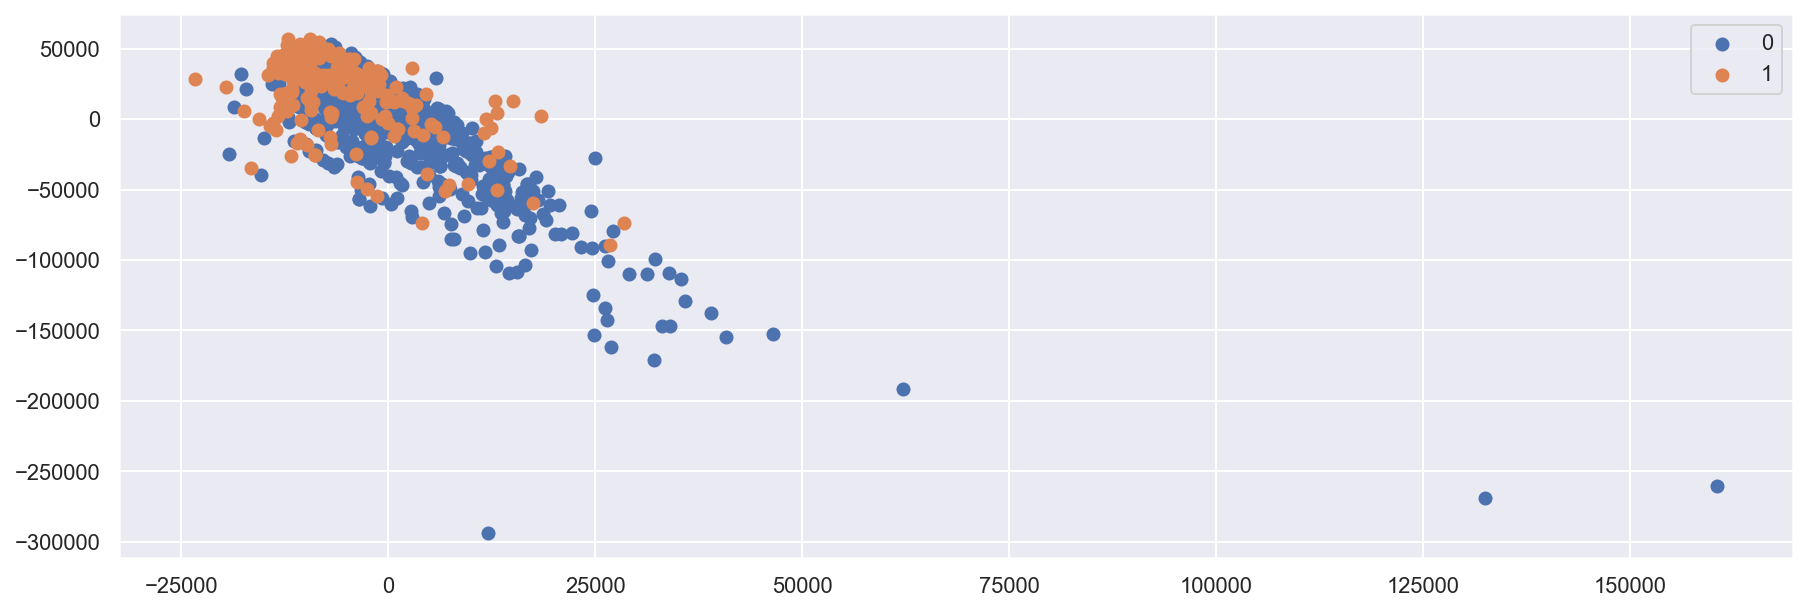

In [68]:
df_sample = df.sample(1000,axis=0)
X_sample = df_sample.drop('loan_status', axis=1).values
y_sample= df_sample['loan_status'].values

from sklearn.manifold import MDS

mds = MDS(n_components=2)
X2D = mds.fit_transform(X_sample)
figure = plt.figure(1,(15,5))
for label in set(y_sample):
    data = X2D[y_sample==label]
    plt.scatter(data[:,0], data[:,1],label=label)
plt.legend()
plt.show()

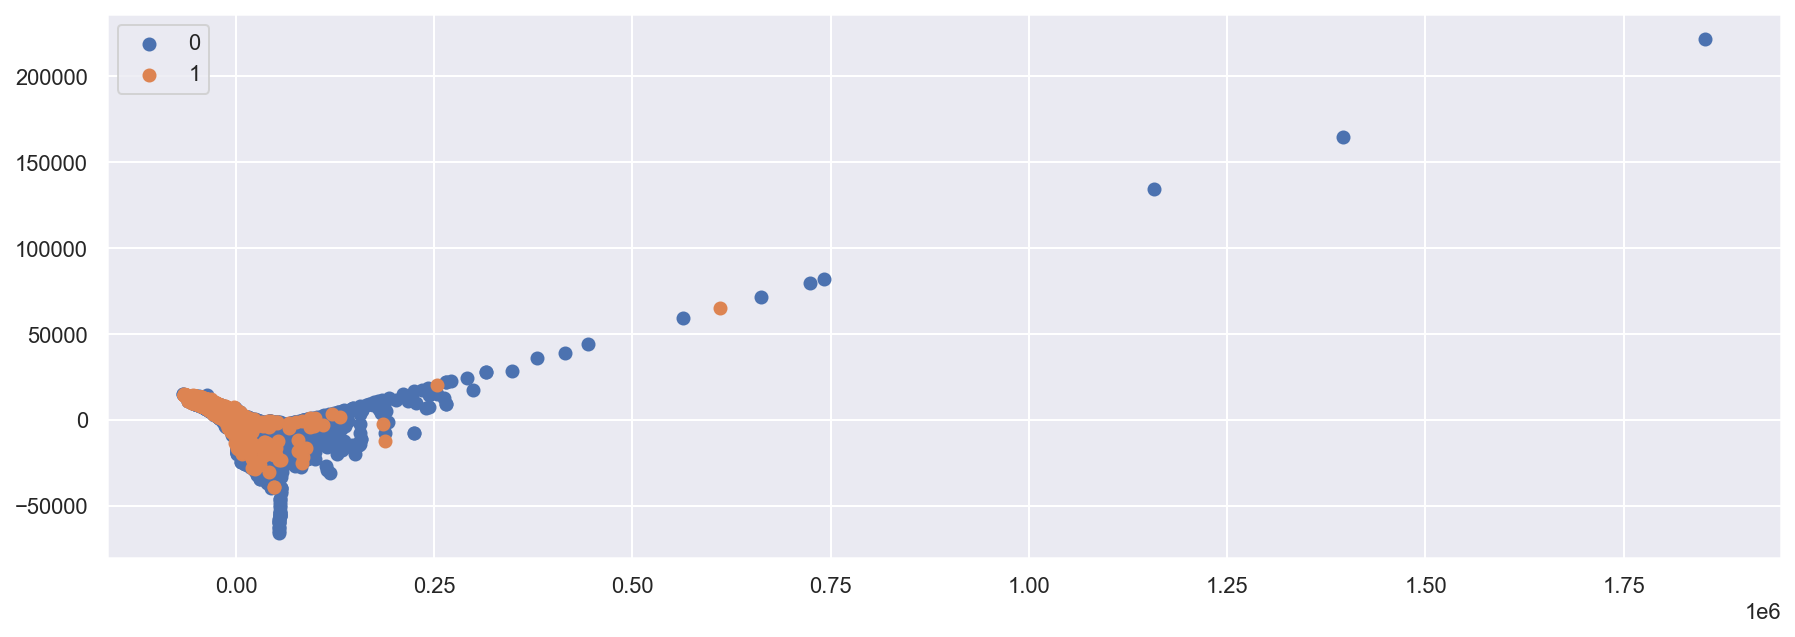

In [78]:
df_sample = df.sample(4000,axis=0)
X_sample = df_sample.drop('loan_status', axis=1).values
y_sample= df_sample['loan_status'].values
from sklearn.manifold import Isomap

isomap = Isomap(n_components=2)
X2D = isomap.fit_transform(X_sample)
figure = plt.figure(1,(15,5))
for label in set(y_sample):
    data = X2D[y_sample==label]
    plt.scatter(data[:,0], data[:,1],label=label)
plt.legend()
plt.show()

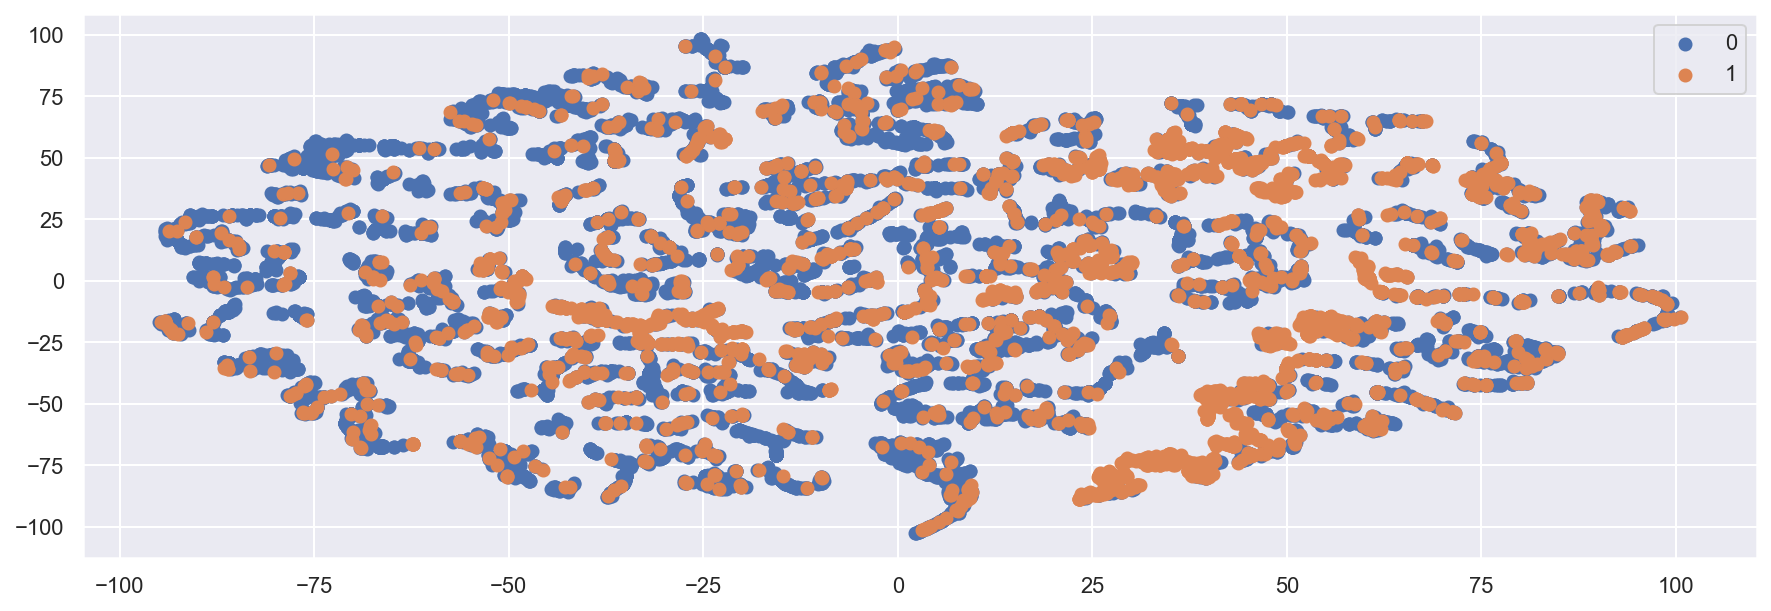

In [80]:
df_sample = df.sample(15000,axis=0)
X_sample = df_sample.drop('loan_status', axis=1).values
y_sample= df_sample['loan_status'].values
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
X2D = tsne.fit_transform(X_sample)
figure = plt.figure(1,(15,5))
for label in set(y_sample):
    data = X2D[y_sample==label]
    plt.scatter(data[:,0], data[:,1],label=label)
plt.legend()
plt.show()

**Warning** : It is not guaranteed that random samples will describe the population sufficiently!

Now it is time for model construction and using hyper-parameter tuning methods to obtain best accuracy possible.

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report,accuracy_score, confusion_matrix
from scipy.stats import loguniform as loguniform

In [24]:
pca = PCA()
scaler = StandardScaler()
lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
pipe_lr = Pipeline([("scaler",scaler),("dimension_reduction",pca),("classifier",lr)])
pipe_dt = Pipeline([("scaler",scaler),("dimension_reduction",pca),("classifier",dt)])
pipe_rf = Pipeline([("scaler",scaler),("dimension_reduction",pca),("classifier",rf)])

## Logistic Regression Classification

In [25]:
# Search space construction for Randomized Search
space_lr = dict()
space_lr["classifier__C"] = loguniform(1e-5, 100)
space_lr["dimension_reduction__n_components"] = [14,15,16,17,18,19]

In [26]:
rs_lr = RandomizedSearchCV(pipe_lr,space_lr,n_iter = 200,scoring="accuracy",n_jobs=-1,cv = 5,verbose=2)

In [27]:
rs_lr.fit(train_x,train_y)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('dimension_reduction', PCA()),
                                             ('classifier',
                                              LogisticRegression())]),
                   n_iter=200, n_jobs=-1,
                   param_distributions={'classifier__C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000025D679A4640>,
                                        'dimension_reduction__n_components': [14,
                                                                              15,
                                                                              16,
                                                                              17,
                                                                              18,
                                                                              19]},
                   scor

### Results :

In [28]:
rs_lr.best_params_

{'classifier__C': 0.01770578747011631, 'dimension_reduction__n_components': 19}

In [29]:
lr_model = rs_lr.best_estimator_

In [34]:
accuracy_score(test_y,lr_model.predict(test_x))

0.8602283245911756

In [35]:
confusion_matrix(test_y,lr_model.predict(test_x))

array([[2412,  120],
       [ 333,  376]], dtype=int64)

In [37]:
print(classification_report(test_y,lr_model.predict(test_x)))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      2532
           1       0.76      0.53      0.62       709

    accuracy                           0.86      3241
   macro avg       0.82      0.74      0.77      3241
weighted avg       0.85      0.86      0.85      3241



## Decision Tree Classification

In [48]:
# Search space construction for Grid Search
space_dt = dict()
space_dt["classifier__max_depth"] = [None,10,20,30,40,50,60,70,80,90,100] 
space_dt["classifier__max_features"] = ["auto","sqrt","log2"] 
space_dt["dimension_reduction__n_components"] = [14,15,16,17,18,19]

In [49]:
# Search space is consists of lesser elements, so I will use GridSearchCV.
gs_dt = GridSearchCV(pipe_dt,space_dt,n_jobs=-1,cv = 5,verbose=2)

In [50]:
gs_dt.fit(train_x,train_y)

Fitting 5 folds for each of 198 candidates, totalling 990 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('dimension_reduction', PCA()),
                                       ('classifier',
                                        DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': [None, 10, 20, 30, 40, 50, 60,
                                                   70, 80, 90, 100],
                         'classifier__max_features': ['auto', 'sqrt', 'log2'],
                         'dimension_reduction__n_components': [14, 15, 16, 17,
                                                               18, 19]},
             verbose=2)

### Results : 

In [51]:
gs_dt.best_params_

{'classifier__max_depth': 10,
 'classifier__max_features': 'auto',
 'dimension_reduction__n_components': 18}

In [52]:
accuracy_score(gs_dt.best_estimator_.predict(test_x),test_y)

0.8676334464671398

## Random Forest Classification

In [56]:
# Search space construction for Randomized Search
space_rf = dict()
space_rf["classifier__n_estimators"] = list(range(50,251,50))
space_rf["classifier__max_depth"] = [None,10,20,30,40,50]
space_rf["classifier__max_features"] = ["log2"]
space_rf["classifier__bootstrap"] = [True,False]
space_rf["dimension_reduction__n_components"] = [14,15,16,17,18,19]


In [57]:
rs_rf = RandomizedSearchCV(pipe_rf,space_rf,n_iter=100,scoring="accuracy",n_jobs=-1,cv = 4,verbose=2)

In [58]:
rs_rf.fit(train_x,train_y)

Fitting 4 folds for each of 100 candidates, totalling 400 fits


RandomizedSearchCV(cv=4,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('dimension_reduction', PCA()),
                                             ('classifier',
                                              RandomForestClassifier())]),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'classifier__bootstrap': [True, False],
                                        'classifier__max_depth': [None, 10, 20,
                                                                  30, 40, 50],
                                        'classifier__max_features': ['log2'],
                                        'classifier__n_estimators': [50, 100,
                                                                     150, 200,
                                                                     250],
                                        'dimension_reduction__n_components': [14,
               

In [60]:
rs_rf.best_params_

{'dimension_reduction__n_components': 19,
 'classifier__n_estimators': 200,
 'classifier__max_features': 'log2',
 'classifier__max_depth': None,
 'classifier__bootstrap': True}

In [61]:
accuracy_score(rs_rf.best_estimator_.predict(test_x),test_y)

0.9142240049367479

**Results** :The winner in this project is Random Forest Classifier.